In [1]:
pwd

'D:\\GAISSA\\energy-repo\\last_repo\\energy-ml-serving\\experiments'

In [2]:
cd ..

D:\GAISSA\energy-repo\last_repo\energy-ml-serving


In [1]:

cd "D:\\GAISSA\\energy-repo\\last_repo"

D:\GAISSA\energy-repo\last_repo


In [2]:
results_dir = 'june_gpu_02/results_1/'

In [3]:
ls

 Volume in drive D is Data
 Volume Serial Number is 5817-1887

 Directory of D:\GAISSA\energy-repo\last_repo

10/06/2024  16:05    <DIR>          .
25/03/2024  02:06    <DIR>          ..
05/06/2024  14:00    <DIR>          energy-ml-serving
08/06/2024  21:26    <DIR>          june_01
10/06/2024  17:43    <DIR>          june_gpu_02
06/06/2024  01:17    <DIR>          june_results
06/06/2024  14:40    <DIR>          june_results_02
06/06/2024  19:00    <DIR>          june_results_03
15/05/2024  18:03    <DIR>          results
04/06/2024  18:04    <DIR>          results_jun_01
05/06/2024  14:36    <DIR>          results_jun_02
04/06/2024  19:25           691.986 results06.svg
01/05/2024  12:08    <DIR>          resultsb01
               1 File(s)        691.986 bytes
              12 Dir(s)  113.096.368.128 bytes free


In [4]:
ENERGIBRIDGE_SAVE_CSV = 'energibridge_dataset.csv'
NVIDIA_SAVE_CSV = 'nvidia-smi_dataset.csv'
WATTMETER_SAVE_CSV = 'wattmeter_dataset.csv'

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
file_name = results_dir + WATTMETER_SAVE_CSV
df = pd.read_csv(file_name, )#index_col='System Time'
df.head()

,Wattmetter Timestamp,True timestamp,time,runtime,model,ID,Name,State,Action,Delay,Current,PowerFactor,Phase,Energy,ReverseEnergy,EnergyNR,ReverseEnergyNR,Load
0,2024-06-08T21:47:02+0100,2024-06-08 21:47:02.854518,2024-06-08 21:47:02.854518,torch,pythia1-4b,1,Power output 1,1,6,5000,717,1.00,336.26,120086,0,120086,0,174
1,2024-06-08T21:47:03+0100,2024-06-08 21:47:03.429127,2024-06-08 21:47:03.429127,torch,pythia1-4b,1,Power output 1,1,6,5000,717,1.00,336.26,120086,0,120086,0,174
2,2024-06-08T21:47:03+0100,2024-06-08 21:47:04.017249,2024-06-08 21:47:04.017249,torch,pythia1-4b,1,Power output 1,1,6,5000,812,0.91,335.38,120086,0,120086,0,176
3,2024-06-08T21:47:04+0100,2024-06-08 21:47:04.591239,2024-06-08 21:47:04.591239,torch,pythia1-4b,1,Power output 1,1,6,5000,812,0.91,335.38,120086,0,120086,0,176
4,2024-06-08T21:47:05+0100,2024-06-08 21:47:05.163254,2024-06-08 21:47:05.163254,torch,pythia1-4b,1,Power output 1,1,6,5000,812,0.91,335.38,120086,0,120086,0,176


In [7]:
print(df.columns)

Index(['Wattmetter Timestamp', 'True timestamp', 'time', 'runtime', 'model',
       'ID', 'Name', 'State', 'Action', 'Delay', 'Current', 'PowerFactor',
       'Phase', 'Energy', 'ReverseEnergy', 'EnergyNR', 'ReverseEnergyNR',
       'Load'],
      dtype='object')


In [8]:
df["time"] = pd.to_datetime(df["time"])
df.head()

,Wattmetter Timestamp,True timestamp,time,runtime,model,ID,Name,State,Action,Delay,Current,PowerFactor,Phase,Energy,ReverseEnergy,EnergyNR,ReverseEnergyNR,Load
0,2024-06-08T21:47:02+0100,2024-06-08 21:47:02.854518,2024-06-08 21:47:02.854518,torch,pythia1-4b,1,Power output 1,1,6,5000,717,1.00,336.26,120086,0,120086,0,174
1,2024-06-08T21:47:03+0100,2024-06-08 21:47:03.429127,2024-06-08 21:47:03.429127,torch,pythia1-4b,1,Power output 1,1,6,5000,717,1.00,336.26,120086,0,120086,0,174
2,2024-06-08T21:47:03+0100,2024-06-08 21:47:04.017249,2024-06-08 21:47:04.017249,torch,pythia1-4b,1,Power output 1,1,6,5000,812,0.91,335.38,120086,0,120086,0,176
3,2024-06-08T21:47:04+0100,2024-06-08 21:47:04.591239,2024-06-08 21:47:04.591239,torch,pythia1-4b,1,Power output 1,1,6,5000,812,0.91,335.38,120086,0,120086,0,176
4,2024-06-08T21:47:05+0100,2024-06-08 21:47:05.163254,2024-06-08 21:47:05.163254,torch,pythia1-4b,1,Power output 1,1,6,5000,812,0.91,335.38,120086,0,120086,0,176


In [9]:
df.set_index('time', inplace=True)

df.head()

,Wattmetter Timestamp,True timestamp,runtime,model,ID,Name,State,Action,Delay,Current,PowerFactor,Phase,Energy,ReverseEnergy,EnergyNR,ReverseEnergyNR,Load
time,,,,,,,,,,,,,,,,,
2024-06-08 21:47:02.854518,2024-06-08T21:47:02+0100,2024-06-08 21:47:02.854518,torch,pythia1-4b,1,Power output 1,1,6,5000,717,1.00,336.26,120086,0,120086,0,174
2024-06-08 21:47:03.429127,2024-06-08T21:47:03+0100,2024-06-08 21:47:03.429127,torch,pythia1-4b,1,Power output 1,1,6,5000,717,1.00,336.26,120086,0,120086,0,174
2024-06-08 21:47:04.017249,2024-06-08T21:47:03+0100,2024-06-08 21:47:04.017249,torch,pythia1-4b,1,Power output 1,1,6,5000,812,0.91,335.38,120086,0,120086,0,176
2024-06-08 21:47:04.591239,2024-06-08T21:47:04+0100,2024-06-08 21:47:04.591239,torch,pythia1-4b,1,Power output 1,1,6,5000,812,0.91,335.38,120086,0,120086,0,176
2024-06-08 21:47:05.163254,2024-06-08T21:47:05+0100,2024-06-08 21:47:05.163254,torch,pythia1-4b,1,Power output 1,1,6,5000,812,0.91,335.38,120086,0,120086,0,176


In [10]:
df.columns

Index(['Wattmetter Timestamp', 'True timestamp', 'runtime', 'model', 'ID',
       'Name', 'State', 'Action', 'Delay', 'Current', 'PowerFactor', 'Phase',
       'Energy', 'ReverseEnergy', 'EnergyNR', 'ReverseEnergyNR', 'Load'],
      dtype='object')

In [11]:
energy_columns = ['Current', 'PowerFactor', 'Phase',
       'Energy', 'ReverseEnergy', 'EnergyNR', 'ReverseEnergyNR', 'Load']



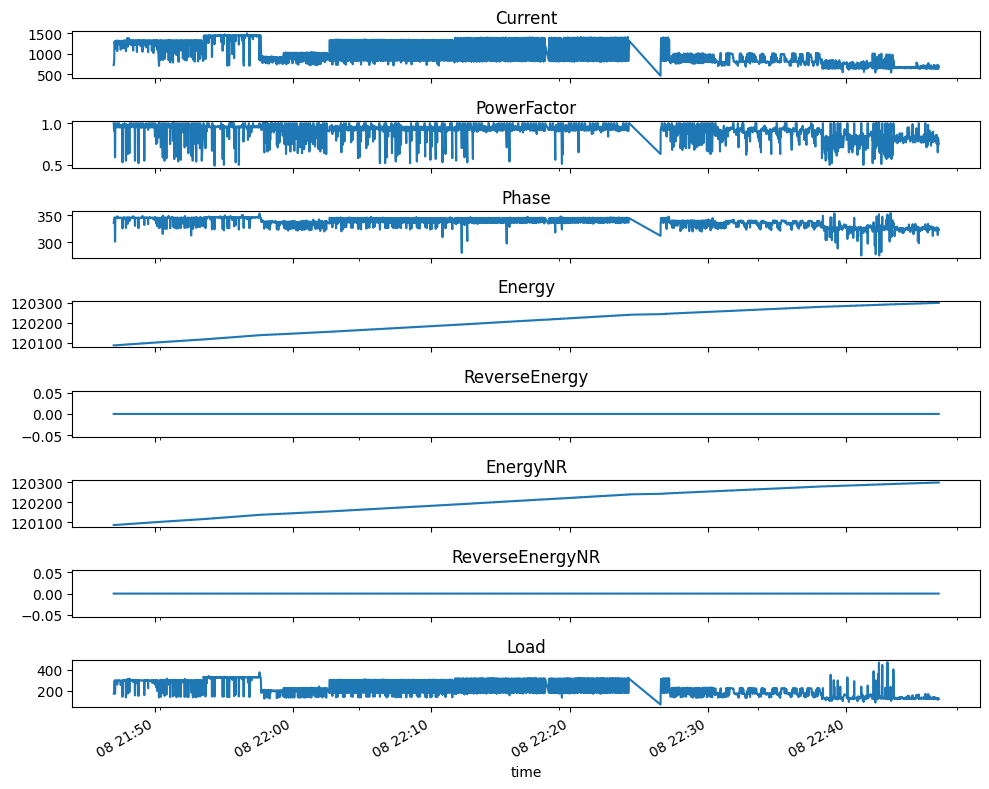

In [12]:
# Plotting time series for energy columns
fig, axs = plt.subplots(len(energy_columns), 1, figsize=(10, 8), sharex=True)

for i, col in enumerate(energy_columns):
    df[col].plot(ax=axs[i], title=col)

# Improve spacing
plt.tight_layout()

# Show plot
plt.show()

In [13]:
file_name = results_dir + 'processed_wattmeter.csv'
wattmeter_2 = pd.read_csv(file_name, )#index_col='System Time'
wattmeter_2.head()

,time,runtime,model,Current,PowerFactor,Phase,Energy,ReverseEnergy,EnergyNR,ReverseEnergyNR,Load,label,avg_Current,avg_PowerFactor,avg_Phase,diff_Energy,avg_diff_Energy,diff_EnergyNR,avg_diff_EnergyNR,avg_Load
0,2024-06-08 21:47:02.854518,torch,pythia1-4b,717,1.00,336.26,120086,0,120086,0,174,torch_pythia1-4b,1278.477341,0.931662,343.706465,NaN,0.045455,NaN,0.045455,284.371601
1,2024-06-08 21:47:03.429127,torch,pythia1-4b,717,1.00,336.26,120086,0,120086,0,174,torch_pythia1-4b,1278.477341,0.931662,343.706465,0.0,0.045455,0.0,0.045455,284.371601
2,2024-06-08 21:47:04.017249,torch,pythia1-4b,812,0.91,335.38,120086,0,120086,0,176,torch_pythia1-4b,1278.477341,0.931662,343.706465,0.0,0.045455,0.0,0.045455,284.371601
3,2024-06-08 21:47:04.591239,torch,pythia1-4b,812,0.91,335.38,120086,0,120086,0,176,torch_pythia1-4b,1278.477341,0.931662,343.706465,0.0,0.045455,0.0,0.045455,284.371601
4,2024-06-08 21:47:05.163254,torch,pythia1-4b,812,0.91,335.38,120086,0,120086,0,176,torch_pythia1-4b,1278.477341,0.931662,343.706465,0.0,0.045455,0.0,0.045455,284.371601


In [15]:
wattmeter_2.columns

Index(['time', 'runtime', 'model', 'Current', 'PowerFactor', 'Phase', 'Energy',
       'ReverseEnergy', 'EnergyNR', 'ReverseEnergyNR', 'Load', 'label',
       'avg_Current', 'avg_PowerFactor', 'avg_Phase', 'diff_Energy',
       'avg_diff_Energy', 'diff_EnergyNR', 'avg_diff_EnergyNR', 'avg_Load'],
      dtype='object')

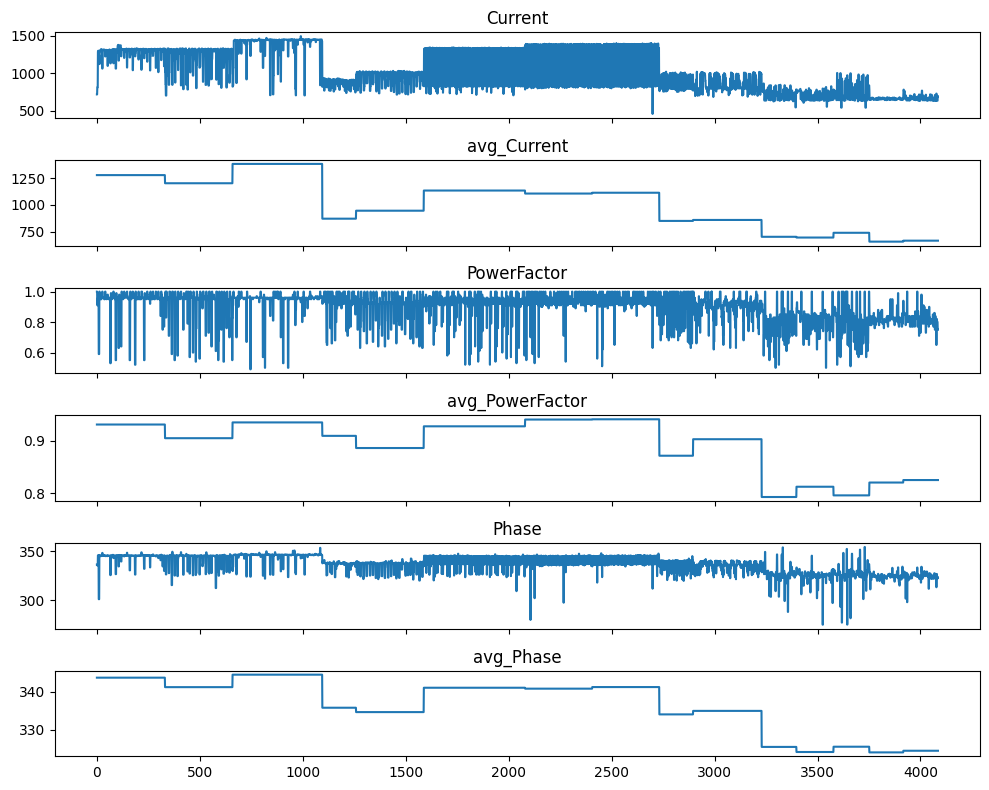

In [16]:
#energy_columns = [' utilization.gpu [%]','avg_ utilization.gpu [%]',' utilization.memory [%]','avg_ utilization.memory [%]',' power.draw [W]','avg_ power.draw [W]',]
energy_columns = ['Current','avg_Current','PowerFactor','avg_PowerFactor','Phase','avg_Phase']

# Plotting time series for energy columns
fig, axs = plt.subplots(len(energy_columns), 1, figsize=(10, 8), sharex=True)

for i, col in enumerate(energy_columns):
    wattmeter_2[col].plot(ax=axs[i], title=col)

# Improve spacing
plt.tight_layout()

# Show plot
plt.show()

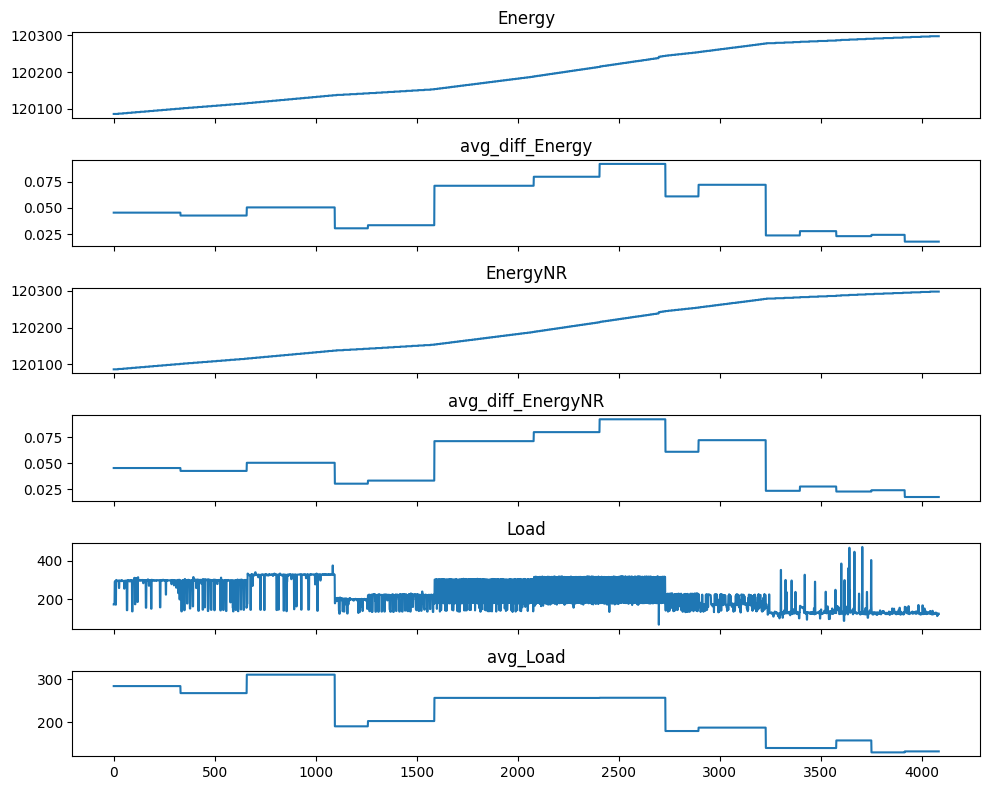

In [17]:
energy_columns = ['Energy', 'avg_diff_Energy','EnergyNR','avg_diff_EnergyNR', 'Load','avg_Load',]

#energy_columns = [' utilization.gpu [%]','avg_ utilization.gpu [%]',' utilization.memory [%]','avg_ utilization.memory [%]',' power.draw [W]','avg_ power.draw [W]',]
#energy_columns = ['Current','avg_Current','PowerFactor','avg_PowerFactor','Phase','avg_Phase']

# Plotting time series for energy columns
fig, axs = plt.subplots(len(energy_columns), 1, figsize=(10, 8), sharex=True)

for i, col in enumerate(energy_columns):
    wattmeter_2[col].plot(ax=axs[i], title=col)

# Improve spacing
plt.tight_layout()

# Show plot
plt.show()